# Explore data collected

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Explore data with only FACE

### Load data

In [2]:
df_path = "..\\data_collection_phase\\data\\eye_data.csv"
df = pd.read_csv(df_path)
df.head()

,File Path Face Image,File Path Left Eye Image,File Path Right Eye Image,x,y
0,data/saved_images/face_image_1.png,data/saved_images/left_eye_image_1.png,data/saved_images/right_eye_image_1.png,1664,624
1,data/saved_images/face_image_2.png,data/saved_images/left_eye_image_2.png,data/saved_images/right_eye_image_2.png,1559,434
2,data/saved_images/face_image_3.png,data/saved_images/left_eye_image_3.png,data/saved_images/right_eye_image_3.png,1163,715
3,data/saved_images/face_image_4.png,data/saved_images/left_eye_image_4.png,data/saved_images/right_eye_image_4.png,377,862
4,data/saved_images/face_image_5.png,data/saved_images/left_eye_image_5.png,data/saved_images/right_eye_image_5.png,750,611


In [3]:
# Drop 'File Path Left Eye Image' and 'File Path Right Eye Image' columns
# because here we are only analizing face and target (x,y)
df = df.drop(['File Path Left Eye Image', 'File Path Right Eye Image'], axis=1)
df.head()

,File Path Face Image,x,y
0,data/saved_images/face_image_1.png,1664,624
1,data/saved_images/face_image_2.png,1559,434
2,data/saved_images/face_image_3.png,1163,715
3,data/saved_images/face_image_4.png,377,862
4,data/saved_images/face_image_5.png,750,611


In [4]:
df.shape

(3435, 3)

### Open images

In [5]:
# to each record in 'File Path Face Image' add "../data_collection_phase/"
df['File Path Face Image'] = df['File Path Face Image'].apply(lambda x: "../data_collection_phase/" + x)
df.head()

,File Path Face Image,x,y
0,../data_collection_phase/data/saved_images/fac...,1664,624
1,../data_collection_phase/data/saved_images/fac...,1559,434
2,../data_collection_phase/data/saved_images/fac...,1163,715
3,../data_collection_phase/data/saved_images/fac...,377,862
4,../data_collection_phase/data/saved_images/fac...,750,611


C:\Users\orlan\AppData\Local\Temp\ipykernel_9492\3693230951.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


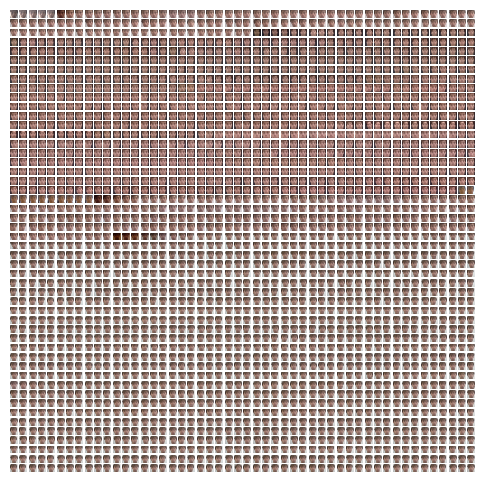

In [6]:
# Create a 3x3 grid of images
fig, axes = plt.subplots(50, 50, figsize=(6, 6))  # Small figure size

for i, ax in enumerate(axes.flat):
    if i >= len(df):
        break  # In case there are fewer than 9 images

    # Read image
    img = cv2.imread(df['File Path Face Image'][i])
    # Convert from BGR (OpenCV default) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image
    ax.imshow(img)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

### Check (x,y) coverage

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   File Path Face Image  3435 non-null   object
 1   x                     3435 non-null   int64 
 2   y                     3435 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 80.6+ KB


In [8]:
df.describe()

,x,y
count,3435.000000,3435.000000
mean,941.570597,534.196215
std,559.532599,312.377889
min,0.000000,0.000000
25%,446.500000,262.000000
50%,933.000000,538.000000
75%,1422.000000,806.000000
max,1919.000000,1079.000000


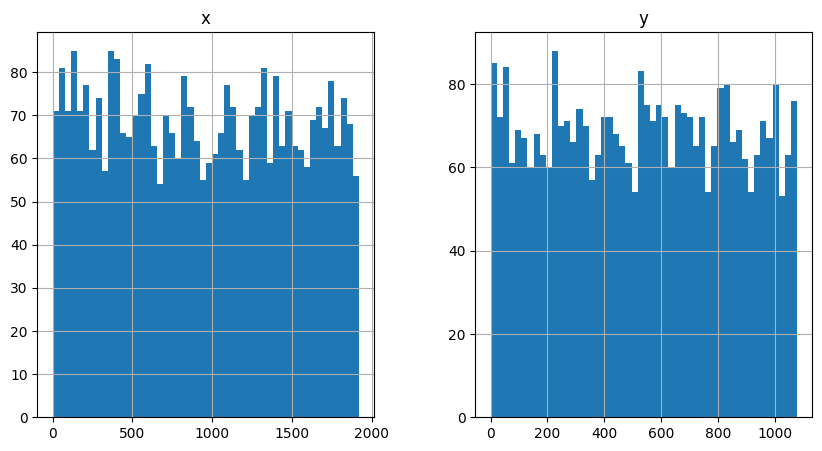

In [9]:
# distribution of target x and y
df.hist(column=['x', 'y'], bins=50, figsize=(10, 5))
plt.show()

Given that the screen is a 1920x1080, we have max values for x = 1919, and y = 1079 and min for both is 0.

Plus as expected (/hoped) the distribution is more or less uniform having at least 55 records on the same x or y.


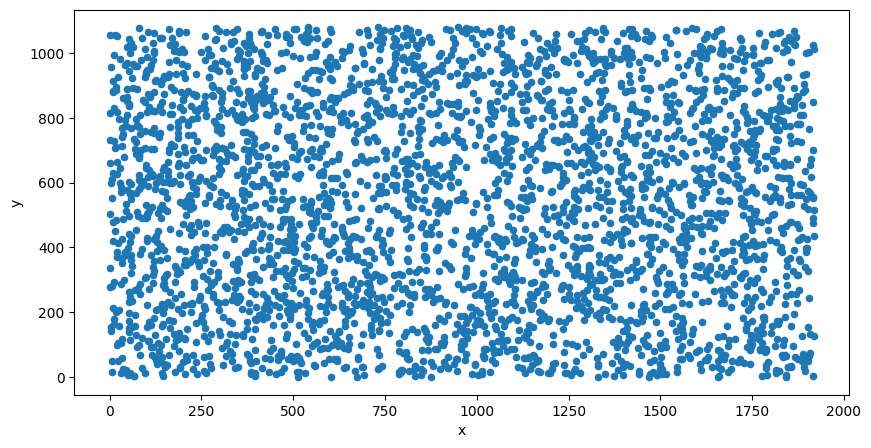

In [10]:
# Plot all combinations of 'x' and 'y' in a scatter plot
df.plot.scatter(x='x', y='y', figsize=(10, 5))
plt.show()

## Explore data with triple FACE, RIGHT AND LEFT EYE

### Load data

In [11]:
df_path = "cleaned_eye_data.csv"
df = pd.read_csv(df_path)
df.head()

,File Path Face Image,File Path Left Eye Image,File Path Right Eye Image,x,y
0,face_image_1.png,left_eye_image_1.png,right_eye_image_1.png,1664,624
1,face_image_2.png,left_eye_image_2.png,right_eye_image_2.png,1559,434
2,face_image_4.png,left_eye_image_4.png,right_eye_image_4.png,377,862
3,face_image_5.png,left_eye_image_5.png,right_eye_image_5.png,750,611
4,face_image_7.png,left_eye_image_7.png,right_eye_image_7.png,524,309


In [12]:
df.shape

(734, 5)

### Open images

In [13]:
# to each record in 'File Path Face Image' add "../data_collection_phase/"
df['File Path Face Image'] = df['File Path Face Image'].apply(lambda x: "../data_collection_phase/data/saved_images/" + x)
df['File Path Left Eye Image'] = df['File Path Left Eye Image'].apply(lambda x: "../data_collection_phase/data/saved_images/" + x)
df['File Path Right Eye Image'] = df['File Path Right Eye Image'].apply(lambda x: "../data_collection_phase/data/saved_images/" + x)
df.head()

,File Path Face Image,File Path Left Eye Image,File Path Right Eye Image,x,y
0,../data_collection_phase/data/saved_images/fac...,../data_collection_phase/data/saved_images/lef...,../data_collection_phase/data/saved_images/rig...,1664,624
1,../data_collection_phase/data/saved_images/fac...,../data_collection_phase/data/saved_images/lef...,../data_collection_phase/data/saved_images/rig...,1559,434
2,../data_collection_phase/data/saved_images/fac...,../data_collection_phase/data/saved_images/lef...,../data_collection_phase/data/saved_images/rig...,377,862
3,../data_collection_phase/data/saved_images/fac...,../data_collection_phase/data/saved_images/lef...,../data_collection_phase/data/saved_images/rig...,750,611
4,../data_collection_phase/data/saved_images/fac...,../data_collection_phase/data/saved_images/lef...,../data_collection_phase/data/saved_images/rig...,524,309


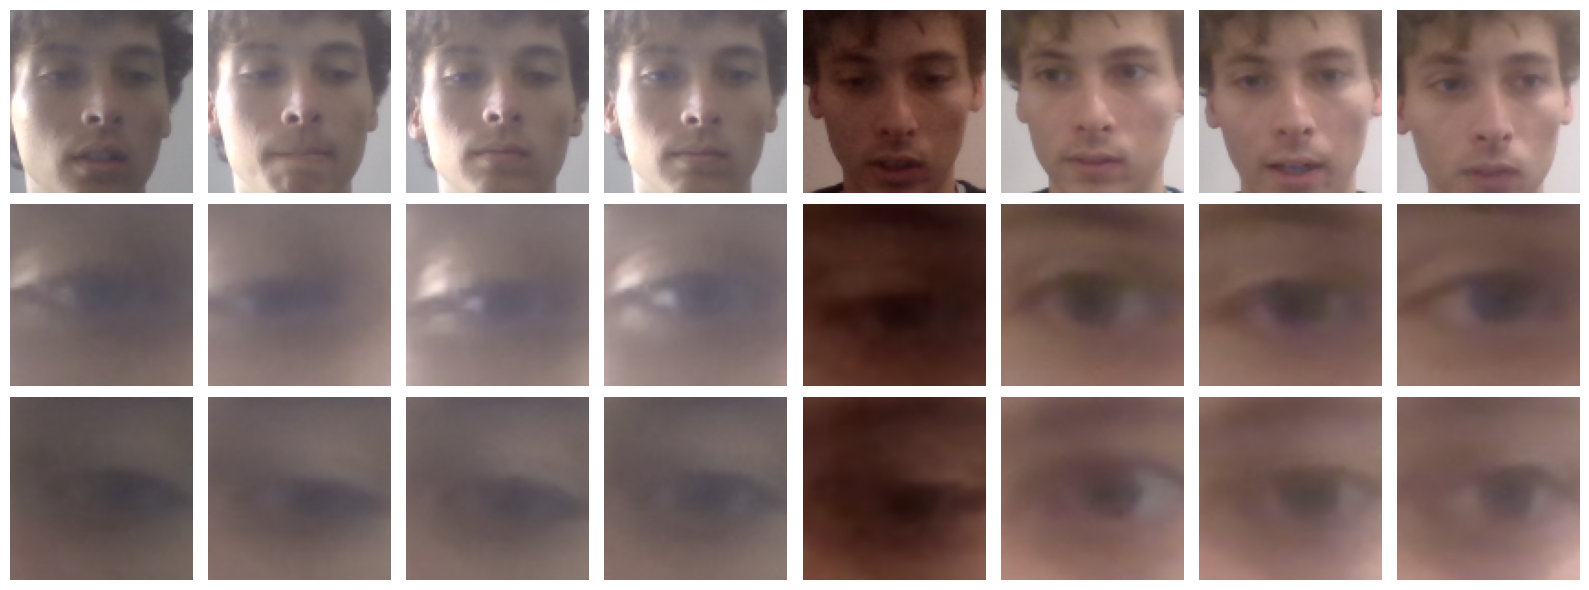

In [14]:
# Set up the grid (3 rows x 8 columns)
fig, axes = plt.subplots(3, 8, figsize=(16, 6))  # Adjust figure size as needed

# Function to load and resize images
def load_and_resize(image_path, size=(100, 100)):
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, size)  # Resize image
        return img
    return None  # Return None if image not found

# Fill the grid with images
image_count = 0
for col in range(8):  # 8 columns
    if image_count >= len(df):
        break  # Stop if we run out of data

    face_img = load_and_resize(df.iloc[image_count]["File Path Face Image"])
    left_eye_img = load_and_resize(df.iloc[image_count]["File Path Left Eye Image"])
    right_eye_img = load_and_resize(df.iloc[image_count]["File Path Right Eye Image"])

    # Display images if they exist
    axes[0, col].imshow(face_img if face_img is not None else [[0]], cmap='gray')
    axes[1, col].imshow(left_eye_img if left_eye_img is not None else [[0]], cmap='gray')
    axes[2, col].imshow(right_eye_img if right_eye_img is not None else [[0]], cmap='gray')

    # Hide axes
    axes[0, col].axis('off')
    axes[1, col].axis('off')
    axes[2, col].axis('off')

    image_count += 1

plt.tight_layout()
plt.show()

### Check (x,y) coverage

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   File Path Face Image       734 non-null    object
 1   File Path Left Eye Image   734 non-null    object
 2   File Path Right Eye Image  734 non-null    object
 3   x                          734 non-null    int64 
 4   y                          734 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 28.8+ KB


In [16]:
df.describe()

,x,y
count,734.000000,734.000000
mean,913.738420,523.175749
std,571.359488,322.867799
min,0.000000,1.000000
25%,412.250000,240.250000
50%,858.500000,516.500000
75%,1421.750000,817.500000
max,1919.000000,1079.000000


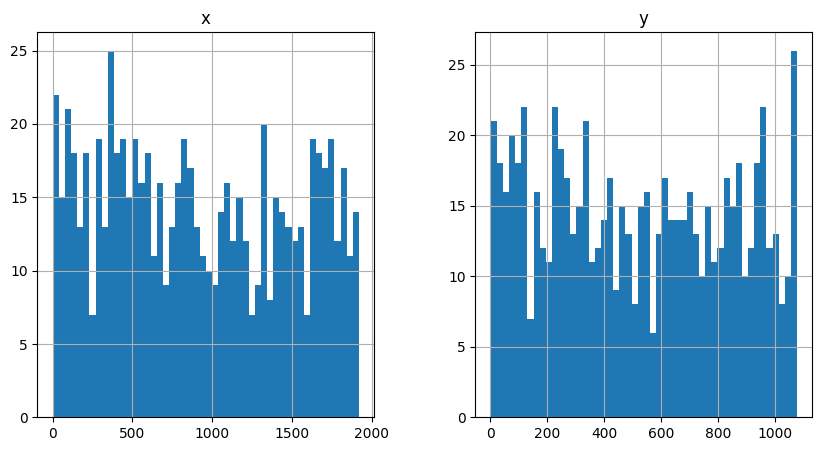

In [17]:
# distribution of target x and y
df.hist(column=['x', 'y'], bins=50, figsize=(10, 5))
plt.show()

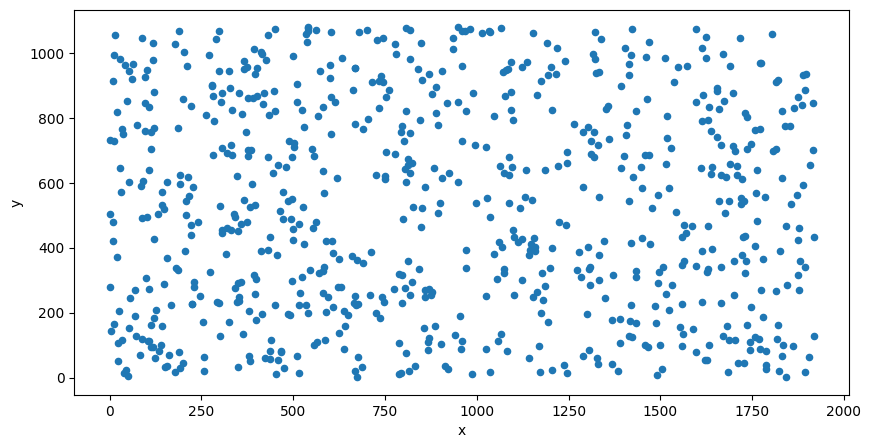

In [18]:
# Plot all combinations of 'x' and 'y' in a scatter plot
df.plot.scatter(x='x', y='y', figsize=(10, 5))
plt.show()